In [217]:
import pandas as pd
import numpy as np

df=pd.read_csv("/content/drive/MyDrive/train_oil.csv")
df_test=pd.read_csv("/content/drive/MyDrive/oil_test.csv")
df.head(2000)

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,HIDES,IMBURU-TORO,PAPUA NEW GUINEA,FAR EAST,PAPUAN FTB,COMPRESSION,-6.0136,142.8409,OIL SEARCH LTD,ONSHORE,GAS-CONDENSATE,CONTINUING DEVELOPMENT,THRUST,9905,JURASSIC-CRETACEOUS,SANDSTONE,490.0,240.0,10.0,100.0
305,DRAKE POINT,DRAKE POINT-INTREPID INLET,CANADA,NORTH AMERICA,SVERDRUP,COMPRESSION/EVAPORITE/EXTENSION/LINKED,76.4462,-108.9172,PANARCTIC OILS,ONSHORE,GAS,UNDEVELOPED,FORELAND,3390,JURASSIC,SANDSTONE,100.0,71.0,20.0,566.0
306,ALTAMONT-BLUEBELL,GREEN RIVER AND COLTON/WASATCH,USA,NORTH AMERICA,UINTA,COMPRESSION,40.3000,-110.2100,NUMEROUS,ONSHORE,OIL,MATURE PRODUCTION,FORELAND,15250,PALEOGENE,SANDSTONE,8000.0,575.0,5.0,0.1
307,BELL CREEK,MUDDY,USA,NORTH AMERICA,POWDER RIVER,COMPRESSION,45.1039,-105.0967,SAMUEL GARY,ONSHORE,OIL,NEARLY DEPLETED,FORELAND,4300,CRETACEOUS,SANDSTONE,45.0,23.0,28.5,2250.0


In [ ]:
df[[Field name, 	Reservoir unit]]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [189]:
df=df.drop(["Field name"],axis=1)
df_test=df_test.drop(["Field name"],axis=1)

In [190]:
df.columns

Index(['Reservoir unit', 'Country', 'Region', 'Basin name', 'Tectonic regime',
       'Latitude', 'Longitude', 'Operator company', 'Onshore/Offshore',
       'Hydrocarbon type', 'Reservoir status', 'Structural setting', 'Depth',
       'Reservoir period', 'Lithology', 'Thickness (gross average ft)',
       'Thickness (net pay average ft)', 'Porosity', 'Permeability'],
      dtype='object')

In [104]:
df["Operator company"].unique()
# df["Reservoir period"].unique()
# df["Permeability"].unique()

array(['NIZHNEVOLZHSKNET', 'PETROBRAS', 'SAUDI ARAMCO', 'CNR', 'NUMEROUS',
       'SREDAZGAZPROM', 'AMERADA HESS', 'SHELL', 'BANF AND AQUITAINE',
       'REPSOL YPF', 'BAPETCO', 'BTA OIL PRODUCERS',
       'IMPERIAL OIL RESOURCES', 'NEXEN', 'ONGC', 'BP AND OTHERS',
       'TALISMAN', 'PTTEP', 'SANTOS', 'KAZAKHOIL AKTOBE',
       'SABLE OFFSHORE ENERGY', 'CNOOC', 'TENNECO',
       'EXXONMOBIL /CONOCOPHILLIPS /CHEVRON', 'ADMA /ZADCO', 'TPAO',
       'PETROCHINA', 'TATNEFT', 'COPAREX /TRITON', 'MANGYSTAUMUNAIGAZ',
       'BP', 'CALTEX PACIFIC INDONESIA', 'WHITING OIL and GAS',
       'CHEVRON /CONOCOPHILLIPS /TOTAL', 'HUSKY ENERGY',
       'PAN AMERICAN PETROLEUM', 'EXXONMOBIL', 'STATOILHYDRO', 'PDO',
       'MAGELLAN PETROLEUM', 'LNOC', 'CHEVRON /EXXONMOBIL', 'CHEVRON',
       'ANADARKO', 'SIBNEFT (MURAVLENKOVSKNEFT)', 'APACHE /BURLINGTON',
       'SURGUTNEFTEGAS', 'MARATHON', 'SHELL /PERENCO', 'CONOCOPHILLIPS',
       'VIKOR RESOURCES', 'HIBERNIA MANAGEMENT DEVELOPMENT CO',
       'KUYB

In [211]:
def1= df["Tectonic regime"].str.get_dummies(sep='/')
def2= df["Structural setting"].str.get_dummies(sep='/')
def3= df["Operator company"].str.get_dummies(sep='/')
def1 = def1.add_suffix(' Tectonic regime')
def2 = def2.add_suffix(' Structural setting')
def3=def3.add_suffix(" Operator company")
def4= df["Reservoir period"].str.get_dummies(sep='-')
def4=def4.add_suffix(" Reservoir period")
df=pd.concat([def1, df,def2, def3,def4], axis=1)
df=df.drop(["Tectonic regime","Structural setting","Operator company", "Reservoir period"],axis=1)

In [6]:
df_test.head()

,Reservoir unit,Region,Tectonic regime,Longitude,Operator company,Structural setting,Depth,Reservoir period,Thickness (net pay average ft),Porosity,Permeability
0,BAHARIYA,AFRICA,EXTENSION,28.4925,GUPCO,RIFT,10282,CRETACEOUS,144.0,10.0,8.0
1,ABU MADI (LEVEL III),AFRICA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.3616,IEOC,WRENCH/DELTA,10499,NEOGENE,410.0,20.0,300.0
2,KT I,FORMER SOVIET UNION,COMPRESSION/EVAPORITE,57.6667,KAZAKHOIL AKTOBE,SUB-SALT/FORELAND,6000,CARBONIFEROUS,105.0,10.0,20.0
3,BRENT (BRENT EAST),EUROPE,INVERSION/COMPRESSION/EXTENSION,1.7333,TOTAL,RIFT,9790,JURASSIC,344.0,17.0,500.0
4,ANKLESHWAR (HAZAD-ARDOL),FAR EAST,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,72.9167,ONGC,WRENCH/RIFT,2950,PALEOGENE,0.0,21.0,250.0


In [212]:
def11= df_test["Tectonic regime"].str.get_dummies(sep='/')
def22= df_test["Structural setting"].str.get_dummies(sep='/')
def33= df_test["Operator company"].str.get_dummies(sep='/')
def44= df_test["Reservoir period"].str.get_dummies(sep='-')
def11 = def11.add_suffix(' Tectonic regime')
def22 = def22.add_suffix(' Structural setting')
def33=def33.add_suffix(" Operator company")
def44=def44.add_suffix(" Reservoir period")
df_test=pd.concat([def11, df_test,def22,def33,def44], axis=1)
df_test=df_test.drop(["Tectonic regime","Structural setting","Reservoir period","Operator company"],axis=1)

In [55]:
df.head(2000)

,BASEMENT-I Tectonic regime,COMPRESSION Tectonic regime,DIAPIR Tectonic regime,EROSION Tectonic regime,EVAPORITE Tectonic regime,EXTENSION Tectonic regime,GRAVITY Tectonic regime,INVERSION Tectonic regime,LINKED Tectonic regime,REACTIVATION Tectonic regime,...,NEOGENE Reservoir period,ORDOVICIAN Reservoir period,PALEOGENE Reservoir period,PALEOGENE-NEOGENE Reservoir period,PALEOZOIC Reservoir period,PERMIAN Reservoir period,PROTEROZOIC Reservoir period,SILURIAN Reservoir period,TRIASSIC Reservoir period,TRIASSIC-JURASSIC Reservoir period
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
305,0,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
306,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
307,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.isna().sum()

BASEMENT-I Tectonic regime            0
COMPRESSION Tectonic regime           0
DIAPIR Tectonic regime                0
EROSION Tectonic regime               0
EVAPORITE Tectonic regime             0
EXTENSION Tectonic regime             0
GRAVITY Tectonic regime               0
INVERSION Tectonic regime             0
LINKED Tectonic regime                0
REACTIVATION Tectonic regime          0
SHALE Tectonic regime                 0
STRIKE-SLIP Tectonic regime           0
SYNSEDIMENTATION Tectonic regime      0
TRANSPRESSION Tectonic regime         0
TRANSTENSION Tectonic regime          0
UPLIFT Tectonic regime                0
Reservoir unit                        0
Region                               38
Longitude                            30
Operator company                      0
Onshore/Offshore                      0
Depth                                 0
Reservoir period                      0
Thickness (net pay average ft)        0
Porosity                              0


In [66]:
df.head()

,BASEMENT-I Tectonic regime,COMPRESSION Tectonic regime,DIAPIR Tectonic regime,EROSION Tectonic regime,EVAPORITE Tectonic regime,EXTENSION Tectonic regime,GRAVITY Tectonic regime,INVERSION Tectonic regime,LINKED Tectonic regime,REACTIVATION Tectonic regime,...,JURASSIC Reservoir period,MESOZOIC Reservoir period,NEOGENE Reservoir period,ORDOVICIAN Reservoir period,PALEOGENE Reservoir period,PALEOZOIC Reservoir period,PERMIAN Reservoir period,PROTEROZOIC Reservoir period,SILURIAN Reservoir period,TRIASSIC Reservoir period
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df[]

In [107]:
df=df.dropna()

In [12]:
df["Onshore/Offshore"].unique()

array(['ONSHORE', 'OFFSHORE', 'ONSHORE-OFFSHORE'], dtype=object)

In [13]:
df["Onshore/Offshore"]

0       ONSHORE
1       ONSHORE
2       ONSHORE
3      OFFSHORE
4       ONSHORE
         ...   
304     ONSHORE
305     ONSHORE
306     ONSHORE
307     ONSHORE
308     ONSHORE
Name: Onshore/Offshore, Length: 268, dtype: object

In [ ]:
df.head()

,BASEMENT-I,COMPRESSION,DIAPIR,EROSION,EVAPORITE,EXTENSION,GRAVITY,INVERSION,LINKED,REACTIVATION,...,FORELAND,INTRACRATONIC,INVERSION,PASSIVE MARGIN,RIFT,SALT,SUB-SALT,SUB-THRUST,THRUST,WRENCH
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df["Region"]

0      FORMER SOVIET UNION
1            LATIN AMERICA
2              MIDDLE EAST
3                   EUROPE
4            NORTH AMERICA
              ...         
304               FAR EAST
305          NORTH AMERICA
306          NORTH AMERICA
307          NORTH AMERICA
308          NORTH AMERICA
Name: Region, Length: 268, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 308
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BASEMENT-I                      268 non-null    int64  
 1   COMPRESSION                     268 non-null    int64  
 2   DIAPIR                          268 non-null    int64  
 3   EROSION                         268 non-null    int64  
 4   EVAPORITE                       268 non-null    int64  
 5   EXTENSION                       268 non-null    int64  
 6   GRAVITY                         268 non-null    int64  
 7   INVERSION                       268 non-null    int64  
 8   LINKED                          268 non-null    int64  
 9   REACTIVATION                    268 non-null    int64  
 10  SHALE                           268 non-null    int64  
 11  STRIKE-SLIP                     268 non-null    int64  
 12  SYNSEDIMENTATION                268 

In [193]:
from sklearn.preprocessing import LabelEncoder
columnses=df.columns
model1=LabelEncoder()
for column in columnses:
  if (type(column)==type("str")):
    df[column]=model1.fit_transform(df[column])

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BASEMENT-I                      133 non-null    int64  
 1   COMPRESSION                     133 non-null    int64  
 2   DIAPIR                          133 non-null    int64  
 3   EROSION                         133 non-null    int64  
 4   EVAPORITE                       133 non-null    int64  
 5   EXTENSION                       133 non-null    int64  
 6   GRAVITY                         133 non-null    int64  
 7   INVERSION                       133 non-null    int64  
 8   LINKED                          133 non-null    int64  
 9   SHALE                           133 non-null    int64  
 10  STRIKE-SLIP                     133 non-null    int64  
 11  SYNSEDIMENTATION                133 non-null    int64  
 12  TRANSPRESSION                   133 

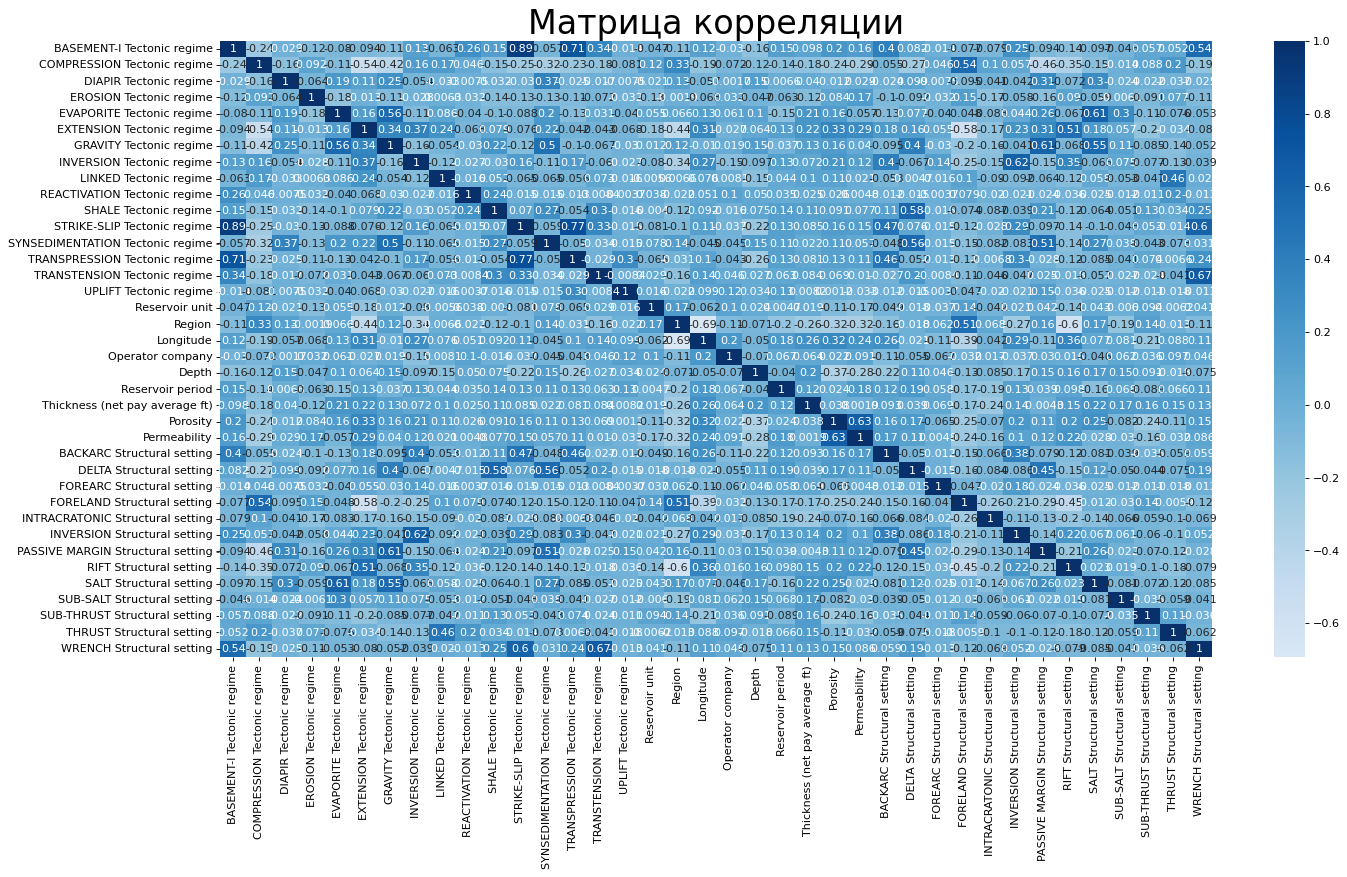

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='Blues', center=0, annot=True)


plt.title('Матрица корреляции', fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
df.head(20)
# print(len(df.columns))

,BASEMENT-I,COMPRESSION,DIAPIR,EROSION,EVAPORITE,EXTENSION,GRAVITY,INVERSION,LINKED,REACTIVATION,...,FORELAND,INTRACRATONIC,INVERSION,PASSIVE MARGIN,RIFT,SALT,SUB-SALT,SUB-THRUST,THRUST,WRENCH
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,1,0,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [194]:
from sklearn.preprocessing import LabelEncoder
columnss=df_test.columns
model2=LabelEncoder()
for column in columnss:
  if (type(column)==type("str")):
    df_test[column]=model2.fit_transform(df_test[column])

In [24]:
df_test.isna().sum()

BASEMENT-I Tectonic regime           0
COMPRESSION Tectonic regime          0
DIAPIR Tectonic regime               0
EROSION Tectonic regime              0
EVAPORITE Tectonic regime            0
EXTENSION Tectonic regime            0
GRAVITY Tectonic regime              0
INVERSION Tectonic regime            0
LINKED Tectonic regime               0
SHALE Tectonic regime                0
STRIKE-SLIP Tectonic regime          0
SYNSEDIMENTATION Tectonic regime     0
TRANSPRESSION Tectonic regime        0
TRANSTENSION Tectonic regime         0
UPLIFT Tectonic regime               0
Reservoir unit                       0
Region                               0
Longitude                            0
Operator company                     0
Depth                                0
Reservoir period                     0
Thickness (net pay average ft)       0
Porosity                             0
Permeability                         0
BACKARC Structural setting           0
DELTA Structural setting 

In [ ]:
df_test.head(202020)

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,0,9,9,0,0,10,30,63,22,2,3,18,113,5,11,69,59,14,16
1,1,2,9,0,27,30,36,64,25,1,1,33,117,9,11,56,79,31,63
2,2,52,14,3,9,2,79,78,27,4,2,24,65,2,9,41,49,14,21
3,3,19,26,1,30,21,106,51,73,4,4,18,105,8,11,74,75,26,71
4,4,5,11,2,6,28,17,81,46,4,3,36,23,11,11,67,0,33,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,121,68,6,2,5,10,58,98,67,4,4,18,64,10,6,59,40,2,17
129,122,101,27,6,40,7,49,2,10,4,4,34,121,9,14,29,61,31,41
130,123,50,6,2,5,10,61,95,51,4,3,18,53,11,11,32,32,43,82
131,123,51,6,2,5,10,61,95,51,4,1,18,43,11,11,24,29,38,48


In [155]:
df.head(1000)
#Onshore-1
#Offshore-0
#ONSHORE-OFFSHORE-2

,BASEMENT-I Tectonic regime,COMPRESSION Tectonic regime,DIAPIR Tectonic regime,EROSION Tectonic regime,EVAPORITE Tectonic regime,EXTENSION Tectonic regime,GRAVITY Tectonic regime,INVERSION Tectonic regime,LINKED Tectonic regime,SHALE Tectonic regime,...,DEVONIAN Reservoir period,JURASSIC Reservoir period,NEOGENE Reservoir period,ORDOVICIAN Reservoir period,PALEOGENE Reservoir period,PALEOZOIC Reservoir period,PERMIAN Reservoir period,PROTEROZOIC Reservoir period,SILURIAN Reservoir period,TRIASSIC Reservoir period
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
305,0,1,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
306,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
307,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
df["Onshore/Offshore"].unique()

array([1, 0, 2])

In [214]:
column1 = df.columns
column2 = df_test.columns

c = set(column1) & set(column2)

In [216]:
df = df[c]
df_test

<ipython-input-216-5682bbd68b98>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df[c]


In [195]:
column1=df.columns
column2=df_test.columns
column3=column1 & column2
for column in column1:
  if column in column3:
    continue
  else:
    if column!="Onshore/Offshore":
      df=df.drop(column,axis=1)
for column in column2:
  if column in column3:
    continue
  else:
    df_test=df_test.drop(column,axis=1)




<ipython-input-195-01e7b9b6921e>:3: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  column3=column1 & column2


In [196]:
len(df.columns)

101

In [112]:
df["Onshore/Offshore"]

0      1
1      1
2      1
3      0
4      1
      ..
304    1
305    1
306    1
307    1
308    1
Name: Onshore/Offshore, Length: 268, dtype: int64

In [197]:
from imblearn.over_sampling import SMOTE
y1=df["Onshore/Offshore"]
x=df.drop(["Onshore/Offshore"],axis=1)

os = SMOTE(random_state=0, k_neighbors=3)

columns = x.columns

os_data_X, os_data_y = os.fit_resample(x, y1)
os_data_X = pd.DataFrame(os_data_X, columns = columns)
os_data_y = pd.DataFrame(os_data_y, columns = ['Onshore/Offshore'])

In [114]:
print(len(os_data_X))
print(len(os_data_y))

561
561


In [ ]:
os_data_X.head(400)

,BASEMENT-I Tectonic regime,COMPRESSION Tectonic regime,DIAPIR Tectonic regime,EROSION Tectonic regime,EVAPORITE Tectonic regime,EXTENSION Tectonic regime,GRAVITY Tectonic regime,INVERSION Tectonic regime,LINKED Tectonic regime,SHALE Tectonic regime,...,FORELAND Structural setting,INTRACRATONIC Structural setting,INVERSION Structural setting,PASSIVE MARGIN Structural setting,RIFT Structural setting,SALT Structural setting,SUB-SALT Structural setting,SUB-THRUST Structural setting,THRUST Structural setting,WRENCH Structural setting
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test.head()

,BASEMENT-I Tectonic regime,COMPRESSION Tectonic regime,DIAPIR Tectonic regime,EROSION Tectonic regime,EVAPORITE Tectonic regime,EXTENSION Tectonic regime,GRAVITY Tectonic regime,INVERSION Tectonic regime,LINKED Tectonic regime,REACTIVATION Tectonic regime,...,FORELAND Structural setting,INTRACRATONIC Structural setting,INVERSION Structural setting,PASSIVE MARGIN Structural setting,RIFT Structural setting,SALT Structural setting,SUB-SALT Structural setting,SUB-THRUST Structural setting,THRUST Structural setting,WRENCH Structural setting
202,0,0,0,0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
352,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
329,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
df.head()

,BASEMENT-I Tectonic regime,COMPRESSION Tectonic regime,DIAPIR Tectonic regime,EROSION Tectonic regime,EVAPORITE Tectonic regime,EXTENSION Tectonic regime,GRAVITY Tectonic regime,INVERSION Tectonic regime,LINKED Tectonic regime,REACTIVATION Tectonic regime,...,FORELAND Structural setting,INTRACRATONIC Structural setting,INVERSION Structural setting,PASSIVE MARGIN Structural setting,RIFT Structural setting,SALT Structural setting,SUB-SALT Structural setting,SUB-THRUST Structural setting,THRUST Structural setting,WRENCH Structural setting
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [198]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3)
scores = []
for i in range(1,15):
    score = {}
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    answers = knn.predict(X_test) 
    
    score['k'] = i
    score['accuracy'] = accuracy_score(answers,y_test)
    
    scores.append(score)

scores = pd.DataFrame(scores)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [116]:
scores.head(20)

,k,accuracy
0,1,0.905325
1,2,0.869822
2,3,0.881657
3,4,0.857988
4,5,0.857988
5,6,0.840237
6,7,0.840237
7,8,0.828402
8,9,0.816568
9,10,0.816568


In [200]:
from sklearn.preprocessing import MinMaxScaler
model5=MinMaxScaler()
xx_columns=os_data_X.columns
xx_new=model5.fit_transform(os_data_X)
xx_new=pd.DataFrame(xx_new,columns=xx_columns)

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xx_new, os_data_y, test_size=0.3)
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

scores = []
for i in range(1,15):
    score = {}
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    answers = knn.predict(X_test) 
    
    score['k'] = i
    score['accuracy'] = accuracy_score(answers,y_test)
    
    scores.append(score)

scores = pd.DataFrame(scores)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [119]:
scores.head(20)

,k,accuracy
0,1,0.928994
1,2,0.923077
2,3,0.923077
3,4,0.905325
4,5,0.881657
5,6,0.869822
6,7,0.875740
7,8,0.852071
8,9,0.840237
9,10,0.822485


In [202]:
knn = KNeighborsClassifier(1)
knn.fit(X_train,y_train)
answerikis=knn.predict(df_test)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [203]:
answeriki1=answerikis


In [204]:
answeriki1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0])

In [137]:
type(answeriki1)

numpy.ndarray

In [205]:
answeriki1 = answeriki1.astype("str")
answeriki1 = [answeriki2.replace("1", 'ONSHORE').replace("0", 'OFFSHORE').replace("2", 'ONSHORE-OFFSHORE') for answeriki2 in answeriki1]

In [207]:
answeriki1


['ONSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'ONSHORE',
 'ONSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'ONSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'ONSHORE',
 'ONSHORE',
 'ONSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'ONSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'ONSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'ONSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'ONSHORE',
 'OFFSHORE',
 'ONSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'ONSHORE',
 'ONSHORE',
 'OFFSHORE',
 'ONSHORE',
 'ONSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'ONSHORE',
 'OFFSHORE',
 'ONSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OFFSHORE',
 'OF

In [206]:
answeriki1=answeriki1.replace(0,"Offshore")
answeriki1=answeriki1.replace(2,"ONSHORE-OFFSHORE")

AttributeError: ignored

In [208]:
df2=pd.DataFrame(answeriki1,columns=["Onshore/Offshore"])
df2=df2.reset_index()

In [209]:
df2.to_csv("/content/answersikihihi1.csv", index=False)

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(xx_new, os_data_y, test_size=0.3)

In [183]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)

clf.fit(X_train,y_train)


DecisionTreeClassifier(random_state=1)

In [178]:
y_predic=clf.predict(df_test)

In [184]:
answeriki1 = y_predic

In [218]:
df3=pd.DataFrame(y_predic,columns=["Onshore/Offshore"])
df3=df3.reset_index()
df3

,index,Onshore/Offshore
0,0,1
1,1,0
2,2,1
3,3,0
4,4,1
...,...,...
128,128,1
129,129,0
130,130,1
131,131,1


In [221]:
df["Onshore/Offshore"]=df["Onshore/Offshore"].astype("str")
df['Onshore/Offshore'].str.replace("1", "ONSHORE")
df['Onshore/Offshore'].str.replace("0","OFFSHORE")
df['Onshore/Offshore'].str.replace("2","ONSHORE-OFFSHORE")

0       ONSHORE
1       ONSHORE
2       ONSHORE
3      OFFSHORE
4       ONSHORE
         ...   
304     ONSHORE
305     ONSHORE
306     ONSHORE
307     ONSHORE
308     ONSHORE
Name: Onshore/Offshore, Length: 309, dtype: object

In [ ]:
df3.to_csv("/content/y_predictionssssssasdasdasdss.csv", index=False)

In [185]:
answeriki1 = answeriki1.astype("str")
answeriki1 = [answeriki2.replace("1", 'ONSHORE').replace("0", 'OFFSHORE').replace("2", 'ONSHORE-OFFSHORE') for answeriki2 in answeriki1]

In [ ]:
y_predic=y_predic.tolist()

In [ ]:
for i in range(len(y_predic)):
  if (y_predic[i]==1):
    y_predic[i]="ONSHORE"
  if (y_predic[i]==0):
    y_predic[i]="OFFSHORE"
  if (y_predic[i]==2):
    y_predic[i]="ONSHORE-OFFSHORE"

In [187]:
os_data_y["Onshore/Offshore"].value_counts()

1    187
0    187
2    187
Name: Onshore/Offshore, dtype: int64